<h1> Równania różniczkowe zwyczajne <h1>
<h3>Wprowadzenie do wszystkich zadań</h3>
    
* Zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* Należy napisać wlasną implementację metody Eulera 
* porównać ją z  metodą  Rungego-Kutty  (np. dostępną  w dowolnym pakiecie numerycznym - dla tych, co lubia Julię - polecam pakiet DifferentialEquations (https://diffeq.sciml.ai/stable/)) dla zadanego na zajęciach równania. 
* <b>Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.</b>

<h3>Punkty:</h3>

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)
* Ewentualne rozszerzenie (extra 3 pkt)

<h3>Zad 1</h3>

Zasymuluj wahadlo matematyczne rozwiazując numerycznie 
rownanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

Rozszerzenie: zasymuluj podwójne wahadlo:
https://www.myphysicslab.com/pendulum/double-pendulum-en.html

<h3>Zad 2</h3>

Zasymuluj układ grawitacyjny : gwiazda i przylatujace
cialo niebieskie z pewną (zadawana przez uzytkownika) prędkością 
poczatkową. 

http://www.artcompsci.org/msa/web/vol_1/v1_web/v1_web.html

Rozszerzenie: rozszerz symulację dla układu trzech ciał poruszających się w polu grawitacyjnym, 

* https://www.kwantowo.pl/2019/09/08/zagadka-ruchu-trzech-cial/

* https://arxiv.org/pdf/1508.02312.pdf

* https://www.wired.com/2016/06/way-solve-three-body-problem/

<h3>Zad3</h3>

Zasymuluj model drapieżnik - ofiara 

x(t)- populacja drapieżników

y(t) -populacja ofiar 

a - współczynnik śmierci drapieżników z powodu braku
ofiar 

b- współczynnik narodzin ofiar, gdy nie ma drapieżników

c- efektywność z jaką drapieżnik wykorzystuje 
energię pozyskaną ze zjedzenia
ofiar  $0.0<c=<1.0$ 

d- efektywność uśmiercania ofiar przez drapieżników

$$
\frac{dx}{dt}=
-a*x+c*d*x*y
$$
$$
\frac{dy}{dt}=
b*y-d*x*y
$$

Rozszerzenie:
Zasymulować wirtualne gatunki za pomocą automatu komórkowego:
* https://grimmel.github.io/posts/2020/10/blog-post-1/
* https://mathworld.wolfram.com/CellularAutomaton.html

<h3> Zad4</h3>

Zasymulować wahadlo magnetyczne. 
$$
\frac{d^2x}{dt^2} + k \frac{dx}{dt} - b(x-x^3)= a \sin{t} 
$$

Dodatkowy materiał znajduje sie w książce: 
Jacek Kudrewicz "Fraktale" (scan załączony osobno) . 

Rozszerzenie: Proszę narysować atraktor Duffinga - trajektorię $(x(t),y(t))$ na płaszczyźnie $(x,y)$ dla różnych wartości parametrów $a,b,k$. 


<h3>Zad 5</h3>

Proszę przeprowadzić symulację epidemii jako model SIR (równanie Kermacka-McKendricka (1927)) opisany układem równań różniczkowych:

$$\frac{dS}{dt}=−\beta SI$$
$$\frac{dI}{dt}=\beta SI−\gamma I$$
$$\frac{dR}{dt}=\gamma I$$
gdzie $\beta >0$ oznacza współczynnik (tempo) rozprzestrzeniania się infekcji,
$\gamma >0$ jest współczynnikiem zdrowienia osobników zainfekowanych.

Warunki początkowe:

S- osobniki podatne $S(0)> 0$

I- osobniki chorujące i roznoszące infekcję $I(0)>0$

R- osobniki ozdrowiałe $R(0)=0$.

Rozszerzenie: zaimplementować model epidemii jako automat komórkowy 
 * https://en.wikipedia.org/wiki/Epidemic_models_on_lattices
 * https://mathworld.wolfram.com/CellularAutomaton.html
 * https://grimmel.github.io/posts/2020/10/blog-post-1/


<h3>Zad6 (bez rozszerzeń-max 4 pkt)</h3>

Rozwiazać równanie różniczkowe dla rozpadu promieniotwórczego
$$\frac{du}{dt}+ \frac{u}{\tau}=0, u(0)=1$$
porownać z 
rozwiazaniem analitycznym 
$$u=e^{-\frac{t}{\tau}}$$
Zbadać stabilność metody Eulera gdy  $$\delta t \leq 2 \tau$$
oraz gdy $$\delta t > 2\tau$$

<h3>Zad7 (bez rozszerzeń-max 4 pkt)</h3>

Zasymulować drgania sprężyny wg równania:
$$m\frac{d^2x}{dt}=-kx $$



# Zad1


Zasymuluj wahadlo matematyczne rozwiazując numerycznie 
rownanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

Rozszerzenie: zasymuluj podwójne wahadlo:
https://www.myphysicslab.com/pendulum/double-pendulum-en.html

Metoda Eulera:

In [1]:
import Pkg
Pkg.add("DifferentialEquations")

    Updating registry at `C:\Users\danie\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Manifest.toml`


In [2]:
Pkg.add("OrdinaryDiffEq")

   Resolving package versions...
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\danie\.julia\environments\v1.7\Manifest.toml`


In [30]:
using Plots
using DifferentialEquations
using OrdinaryDiffEq
using DataFrames

In [4]:
g= 9.81
l = 2.0
x0 = 0.8 * l
v0 = 0.0
t_range = (0.0, 5.0)

(0.0, 5.0)

In [5]:
function euler(x0, v0, g, l, t_range, dt=0.005)
    n = Int((t_range[2] - t_range[1]) / dt)
    t = [i*dt + t_range[1] for i in 0:n]
    x = zeros(n+1)
    v = zeros(n+1)
    dx = 0
    dv = 0
    x[1] = x0
    v[1] = v0
    for i ∈ 1:n
        h = t[i+1] - t[i]
        dx = v[i]
        dv = -g / l * sin(x[i])
        x[i+1] = x[i] + h * dx
        v[i+1] = v[i] + h * dv
    end
    return [t, x, v]
end

euler (generic function with 2 methods)

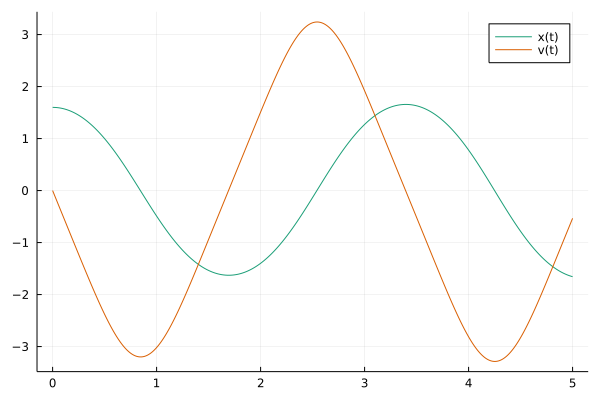

In [6]:
ts,xs,vs = euler(x0,v0,g,l,t_range)
plot(ts,[xs, vs],labels=["x(t)" "v(t)"], palette = :Dark2_5)

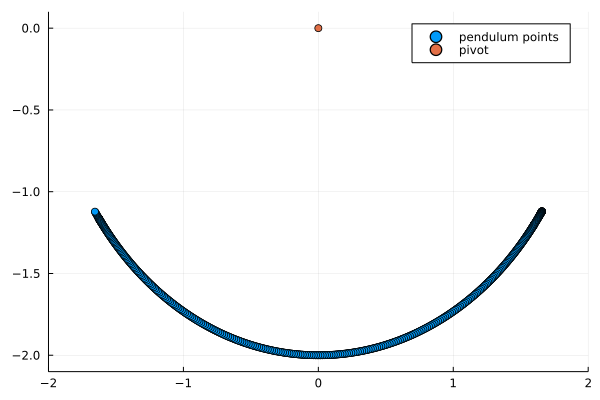

In [7]:
ys = [-sqrt(max(0, l^2 - x^2)) for x in xs]
plot()
scatter!(xs,ys,ylim=(-2.1,0.1),xlim=(-2,2), label="pendulum points")
scatter!((0,0),label="pivot")

Metoda Rungego-Kutty:

In [8]:
function onependulum!(du,u,p)
    g,l = p
    du[1] = u[2]
    du[2] = -g / l * sin(u[1])
end

onependulum! (generic function with 1 method)

In [9]:
u0 = [x0,v0]
p = (g,l)
prob = ODEProblem(onependulum!,u0,t_range,p)
solution = solve(prob,Tsit5(),dt=0.005,adaptive=false)

LoadError: BoundsError: attempt to access Float64 at index [2]

In [10]:
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

LoadError: UndefVarError: solution not defined

In [11]:
ys = [-sqrt(max(0, l^2 - x[1]^2)) for x in solution.u]
xs = [x[1] for x in solution.u]
plot()
scatter!(xs,y,ylim=(-2.1,0.1),xlim=(-2,2), label="pendulum points")
scatter!((0,0),label="pivot")

LoadError: UndefVarError: solution not defined

# Porównanie stabilności:

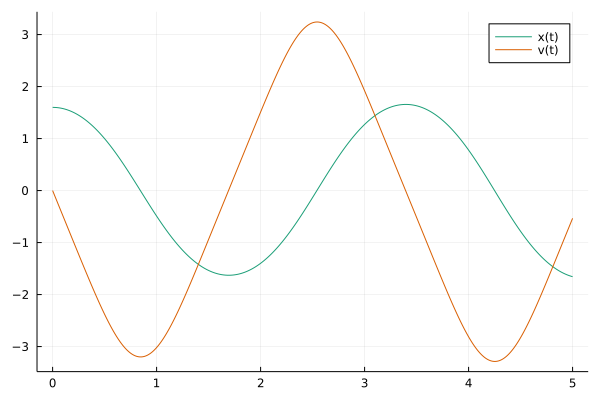

In [12]:
dt = 0.005
ts,xs,vs = euler(x0,v0,g,l,t_range, dt)
plot(ts,[xs, vs],labels=["x(t)" "v(t)"], palette = :Dark2_5)

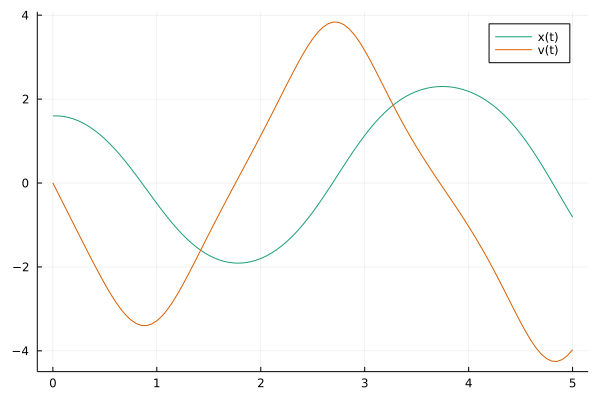

In [13]:
dt = 0.05
ts,xs,vs = euler(x0,v0,g,l,t_range, dt)
plot(ts,[xs, vs],labels=["x(t)" "v(t)"], palette = :Dark2_5)

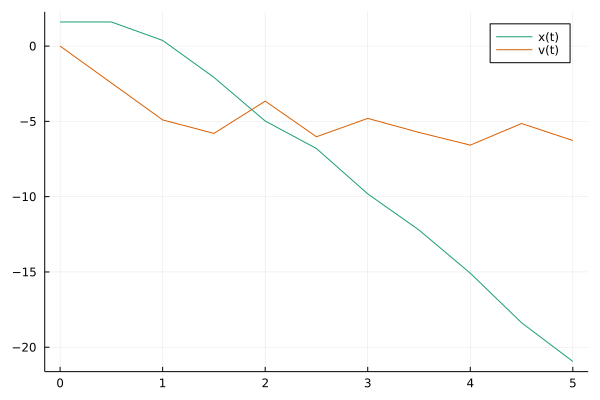

In [14]:
dt = 0.5
ts,xs,vs = euler(x0,v0,g,l,t_range, dt)
plot(ts,[xs, vs],labels=["x(t)" "v(t)"], palette = :Dark2_5)

In [15]:
solution = solve(prob,Tsit5(),dt = 0.005,adaptive=false)
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

LoadError: BoundsError: attempt to access Float64 at index [2]

In [16]:
solution = solve(prob,Tsit5(),dt = 0.05,adaptive=false)
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

LoadError: BoundsError: attempt to access Float64 at index [2]

In [17]:
solution = solve(prob,Tsit5(),dt=0.5,adaptive=false)
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

LoadError: BoundsError: attempt to access Float64 at index [2]

In [18]:
solution = solve(prob,Tsit5(),dt=5,adaptive=false)
plot(solution,labels=["x(t)" "v(t)"], palette = :Dark2_5)

LoadError: BoundsError: attempt to access Float64 at index [2]

Dla dt = 0.5 przy metodzie Eulera błąd jest bardzo duży, a przy metdozie Rungego-Kutty, zatem ta druga metoda
jest dużo bardziej stabilna od tej pierwszej.


# Ciekawa animacja

In [19]:
g= 9.81
l = 2.0
x0 = 0.8 * l
v0 = 0.0
t_range = (0.0, 5.0)

(0.0, 5.0)

In [20]:
ts,xs,vs = euler(x0,v0,g,l,t_range)
ys = [-sqrt(max(0, l^2 - x^2)) for x in xs]
n = Int((t_range[2] - t_range[1]) / dt)

10

┌ Info: Saved animation to 
│   fn = C:\Users\danie\animation_of_good_euler.gif
└ @ Plots C:\Users\danie\.julia\packages\Plots\NQpB8\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\danie\\animation_of_good_euler.gif")
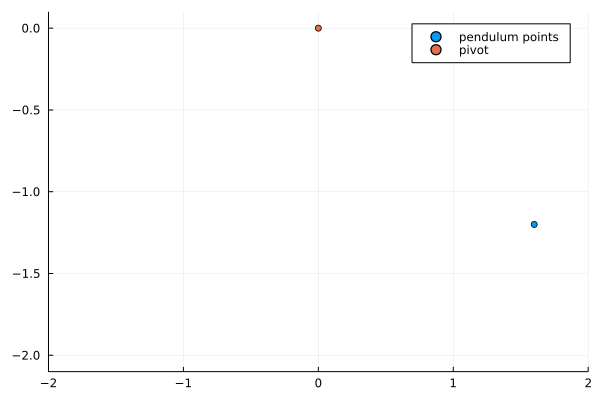

In [21]:
anim = @animate for i in 1:5:n
    plot()
    scatter!([xs[i]],[ys[i]],ylim=(-2.1,0.1),xlim=(-2,2), label="pendulum points")
    scatter!((0,0),label="pivot")
end

gif(anim, "animation_of_good_euler.gif", fps = 30)

In [22]:
g= 9.81
l = 2.0
x0 = 0.8 * l
v0 = 0.0
t_range = (0.0, 20.0)
dt = 0.01

0.01

In [23]:
ts,xs,vs = euler(x0,v0,g,l,t_range, dt)
ys = [-sqrt(max(0, l^2 - x^2)) for x in xs]
n = Int((t_range[2] - t_range[1]) / dt)

2000

┌ Info: Saved animation to 
│   fn = C:\Users\danie\animation_of_bad_euler.gif
└ @ Plots C:\Users\danie\.julia\packages\Plots\NQpB8\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\danie\\animation_of_bad_euler.gif")
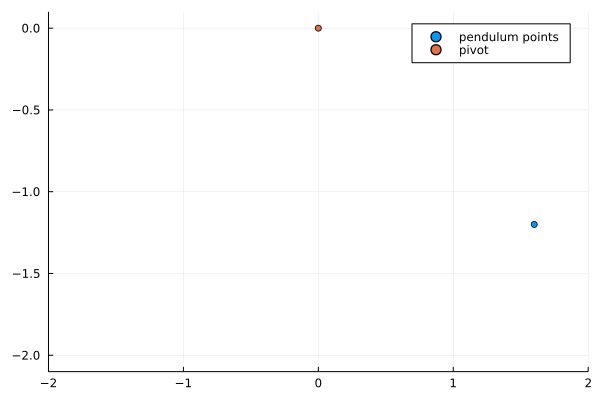

In [24]:
anim = @animate for i in 1:20:n
    plot()
    scatter!([xs[i]],[ys[i]],ylim=(-2.1,0.1),xlim=(-2,2), label="pendulum points")
    scatter!((0,0),label="pivot")
end

gif(anim, "animation_of_bad_euler.gif", fps = 30)

# PODWÓJNE WACHADŁO

https://www.myphysicslab.com/pendulum/double-pendulum-en.html

Wykorzystane wzory:

$$x1 = L1 sin θ1$$

$$y1 = −L1 cos θ1$$

$$x2 = x1 + L2 sin θ2$$

$$y2 = y1 − L2 cos θ2$$

$$θ1' = ω1$$

$$θ2' = ω2$$

$$ω1' = - \frac{−g(2m1 + m2) sin θ1 − m2 g sin(θ1 − 2 θ2) − 2 sin(θ1 − θ2) m2 (ω2^2 L2 + ω1^2 L1 cos(θ1 − θ2))}{L1 (2 m1 + m2 − m2 cos(2 θ1 − 2 θ2))}$$

$$ω2' = - \frac{2 sin(θ1−θ2) (ω1^2 L1 (m1 + m2) + g(m1 + m2) cos θ1 + ω2^2 L2 m2 cos(θ1 − θ2))}{L2 (2 m1 + m2 − m2 cos(2 θ1 − 2 θ2))}$$


In [45]:
function doublependulum!(du,u,p,t)
    g,l1,l2,m1,m2 = p
    du[1] = u[3]
    du[2] = u[4]
    du[3] = (-g*(2*m1 + m2)*sin(u[1]) - m2*g*sin(u[1]-2*u[2]) - 2*sin(u[1]-u[2])*m2*(u[4]*u[4]*l2 + u[3]*u[3]*l1*cos(u[1]-u[2])))/(l1*(2*m1+m2 - m2*cos(2*u[1] - 2*u[2])))
    du[4] = 2*sin(u[1]-u[2])*(u[3]*u[3]*l1*(m1+m2)+g*(m1+m2)*cos(u[1])+u[4]*u[4]*l2*m2*cos(u[1]-u[2]))/(l2*(2*m1+m2-m2*cos(2*u[1]-2*u[2])))
end

doublependulum! (generic function with 1 method)

In [44]:
g = 9.81
l1 = 1.0
l2 = 1.5
m1 = 1.0
m2 = 1.5
u0 = [0.0,-float(π/2),0.0,0.0]
tspan = (0.0, 10.0)

(0.0, 10.0)

In [46]:
function euler_f_double(u0,p, tspan, dt=0.001)
    n = Int((tspan[2] - tspan[1]) / dt)
    t = [i*dt + tspan[1] for i in 0:n]
    u = zeros((n+1, 4))
    du = zeros(4)
    u[1, :] = u0
    for i in 1:n
        h = t[i+1] - t[i]
        doublependulum!(du, u[i, :], p, t[i])
        u[i+1, :] = u[i, :] + h * du
    end
    return [t, u[:, 1], u[:, 2]]
end

euler_f_double (generic function with 2 methods)

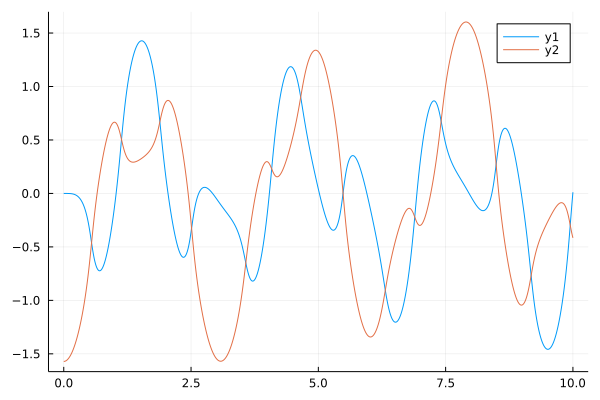

In [48]:
res = euler_f_double(u0,p,tspan)
x1 = [l1*sin(x) for x in res[2]]
x2 = [l2*sin(x) for x in res[3]]
x2 = x2 + x1
y1 = [-l1*cos(x) for x in res[2]]
y2 = [-l2*cos(x) for x in res[3]]
y2 = y2 + y1;
plot(res[1],[res[2],res[3]])

┌ Info: Saved animation to 
│   fn = C:\Users\danie\anim_double_euler.gif
└ @ Plots C:\Users\danie\.julia\packages\Plots\NQpB8\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\danie\\anim_double_euler.gif")
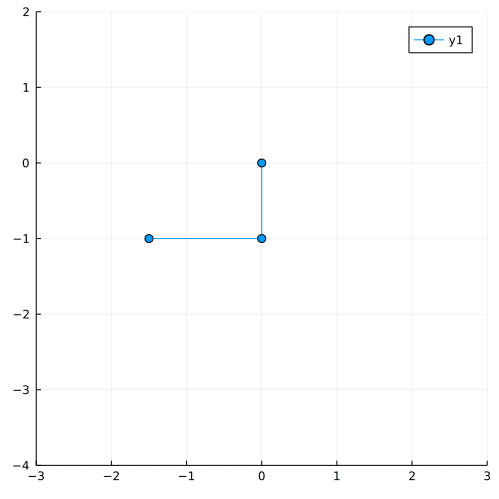

In [51]:
n = size(y1)[1]
anim3 = @animate for i in 1:10:n
    xs = [0, x1[i], x2[i]]
    ys = [0, y1[i], y2[i]]
    plot(xs,ys,size=(500,500),
        ylim=(-4,2),xlim=(-3,3),marker=(:circle,5))
end
gif(anim3, "anim_double_euler.gif", fps = 30)

In [52]:
p = (g,l1,l2,m1,m2)
prob = ODEProblem(doublependulum!,u0,tspan,p)
res = solve(prob,dt=0.001,adaptive=false)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 10001-element Vector{Float64}:
  0.0
  0.001
  0.002
  0.003
  0.004
  0.005
  0.006
  0.007
  0.008
  0.009000000000000001
  0.010000000000000002
  0.011000000000000003
  0.012000000000000004
  ⋮
  9.988999999999903
  9.989999999999903
  9.990999999999902
  9.991999999999901
  9.9929999999999
  9.9939999999999
  9.9949999999999
  9.9959999999999
  9.996999999999899
  9.997999999999898
  9.998999999999898
 10.0
u: 10001-element Vector{Vector{Float64}}:
 [0.0, -1.5707963267948966, 0.0, 0.0]
 [-4.8118043635568604e-12, -1.5707930567948964, -1.9247216221920858e-8, 0.006540000000018184]
 [-7.69888397053617e-11, -1.5707832467948963, -1.5397763916258524e-7, 0.013080000000581838]
 [-3.897557461871267e-10, -1.5707668967948942, -5.196740224401488e-7, 0.019620000004418398]
 [-1.2318195023204373e-9, -1.5707440067948841, -1.2318182136740003e-6, 0.0261600000186194

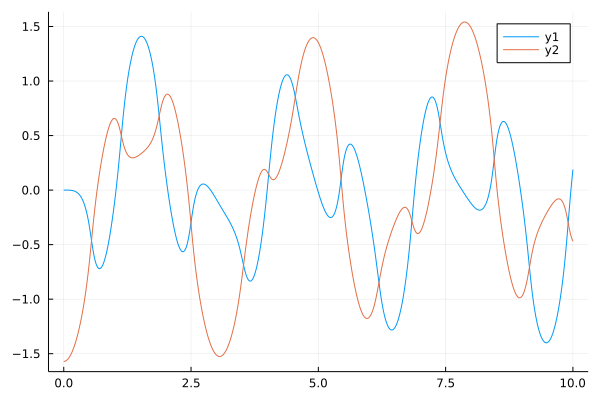

In [53]:
x1 = [l1*sin(x[1]) for x in res.u]
x2 = [l2*sin(x[2]) for x in res.u]
x2 = x2 + x1
y1 = [-l1*cos(x[1]) for x in res.u]
y2 = [-l2*cos(x[2]) for x in res.u]
y2 = y2 + y1;

plot(res.t,[res[1,:],res[2,:]])

┌ Info: Saved animation to 
│   fn = C:\Users\danie\anim_double_Runge.gif
└ @ Plots C:\Users\danie\.julia\packages\Plots\NQpB8\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\danie\\anim_double_Runge.gif")
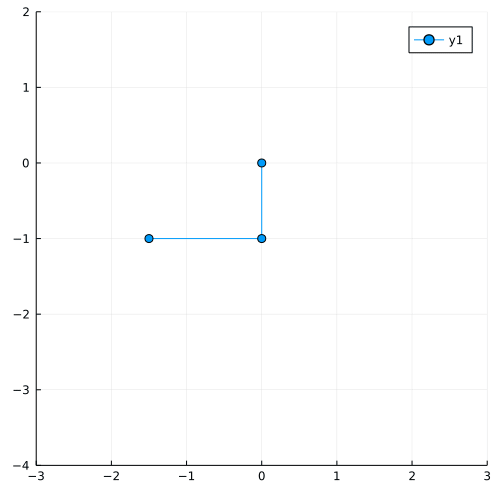

In [54]:
n = size(y1)[1]
anim4 = @animate for i in 1:10:n
    xs = [0, x1[i], x2[i]]
    ys = [0, y1[i], y2[i]]
    plot(xs,ys,size=(500,500),ylim=(-4,2),xlim=(-3,3),marker=(:circle,5))
end
gif(anim4, "anim_double_Runge.gif", fps = 30)